In [1]:
import cv2
import os
import keras
import numpy as np

Using TensorFlow backend.
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dt

In [14]:
image_train_link = './../../Data/TUSimple/train_set/clips/'
image_val_link = './../../Data/TUSimple/val_set/clips/'

In [7]:
os.listdir(new_path_f2)

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '20.png',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

In [15]:
img_links = []
anno_links = []
i=0
for f1 in os.listdir(image_train_link):
    new_path_f1 = os.path.join(image_train_link, f1)
    
    for f2 in os.listdir(new_path_f1):
        new_path_f2 = os.path.join(new_path_f1, f2)
        
        if any(x not in os.listdir(new_path_f2) for x in ['20.jpg', '20.png']):
            i+=1
        img_link = os.path.join(new_path_f2, '20.jpg')
        anno_link = os.path.join(new_path_f2, '20.png')
        
        
        img_links.append(img_link)
        anno_links.append(anno_link)

In [16]:
len(img_links)

3747

In [10]:
i

0

In [22]:
class NumpyDataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, images_link, batch_size=32, dim=(720, 1280, 3), shuffle=False):
        
        self.dim = dim
        self.batch_size = batch_size
        self.images_link = images_link
        self.shuffle = shuffle
        self.images = self.get_all_img()
        self.indexes = None
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.images) / self.batch_size))
    
    def get_all_img(self):
        # Get all (image, annotation) from path
        img_links = []
        for f1 in os.listdir(self.images_link):
            new_path_f1 = os.path.join(self.images_link, f1)
            
            for f2 in os.listdir(new_path_f1):
                new_path_f2 = os.path.join(new_path_f1, f2)
                
                img_link = os.path.join(new_path_f2, '20.jpg')
                anno_link = os.path.join(new_path_f2, '20.png')
                img_links.append((img_link, anno_link))
                
        return img_links

    def __getitem__(self, index):
        'Generate one batch of data'
        #print('Index: {}'.format(index))
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_images_temp = [self.images[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_images_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.images))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_images_temp):
        '''
        Generate data with the specified batch size
        '''
        # Initialization
        X = np.empty((self.batch_size, *self.dim), dtype=np.float32)
        y = np.empty((self.batch_size, *(1280*736)), dtype=np.float32)

        for i, img_anno in enumerate(list_images_temp):
            image = cv2.imread(img_anno[0])
            anno = cv2.imread(img_anno[1])
            anno[anno > 0] = 255
            anno = cv2.resize(anno, (1280, 736))
            anno = np.reshape(anno, (1280*736, 1))
            
#             temp = np.load(self.images_link + image)
                        
            # X[i,] = cv2.resize(temp['img'].astype(np.float32), (256, 256))
            # y[i,] = cv2.resize(temp['anno'].astype(np.float32), (256, 256))
            X[i,] = image
            y[i,] = anno

        return X, y

In [23]:
datagen = NumpyDataGenerator(image_train_link, 32, dim=(720, 1280, 3), shuffle=True)
val_gen = NumpyDataGenerator(image_test_link, 16, dim=(720, 1280, 3))

In [24]:
datagen.images[28][1]

'./../../Data/TUSimple/train_set/clips/0313-1/10520/20.png'

In [25]:
image = cv2.imread(datagen.images[28][1], cv2.IMREAD_UNCHANGED)

In [26]:
from matplotlib import pyplot as plt

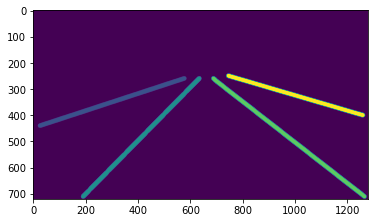

In [27]:
plt.imshow(image)

In [18]:
image[image > 0] = 255

In [17]:
image.shape

(720, 1280)

In [20]:
image = cv2.resize(image, (1280, 736))

In [21]:
image = np.reshape(image, (1280*736, 1))

In [32]:
image = np.reshape(image, (736, 1280))